<a href="https://colab.research.google.com/github/Rashed17a/Stochastic-Modeling-MScFE-622-GWP/blob/main/Stochastic_Modeling_GWP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary of the Paper : Risk-aware multi-armed bandit problem with application to portfolio selection


**Core Problem & Methodology**

The mentioned research has the objective to perform a sequential portfolio selection balancing risk (CVaR) and return (UCB1). This is done by incorporating measures of risk, such as Conditional Value-at-Risk (CVaR), to ensure that portfolio selections account for potential losses, not just expected returns. (Huo, Xiaoguang, and Feng Fu)

**Methodology**

The research follows a three step approach to conceptualize the problem.

Asset Filtering: Utilizing the topological structure of financial markets to filter assets, focusing on those that contribute to a diversified and risk-aware portfolio.
Risk-Aware Selection: Integrating CVaR into the MAB framework to select assets that offer a favorable balance between expected return and risk.
Simulation and Evaluation: Conducting simulations to compare the performance of the proposed algorithm against traditional methods, demonstrating its effectiveness in various market conditions.

**Key Components:**

The core components of the portfolio, as discussed in the research were:

UCB1 Policy: Selects a single asset at each trial based on empirical mean returns + confidence bounds.
CVaR Portfolio: Diversified portfolio minimizing tail risk (95% confidence level).
Combined Portfolio: λ = 0.9 favors UCB1; λ → 0 prioritizes CVaR.

**Working Algorithm**

The algorithm used in the paper follows the following workflow:
Input: K = 30 pre-selected stocks, Parameters: γ = 0.95, λ = 0.9.

For each trial t = 1, ..., N:

UCB1 Portfolio: Select assets using the UCB1 rule.
CVaR Portfolio: Solve convex optimization
Combine Portfolios
Observe Returns: Update empirical means and CVaR data.

**Key Findings**
The study finds that the risk-aware MAB algorithm outperforms traditional portfolio selection methods, particularly in volatile markets. By accounting for risk in the decision-making process, the algorithm achieves a more favorable balance between return and risk, leading to improved investment performance.


# Sequential portfolio selection problem as MAB (Multi Armed Bandit)

Algorithm: Risk-Aware MAB Portfolio Selection

Input:
K = 30 assets (pre-selected, e.g., JPM, XOM, WMT)
Historical returns H_i (δ days) for each asset i
Parameters: λ = 0.9, γ = 0.95 (CVaR confidence), N trials

Output: Cumulative wealth over N trials

Initialize:

For each asset i:
Empirical mean return μ_i = mean(H_i)
Selection count T_i = 0

Historical dataset D = [H_1, H_2, ..., H_K]
Initialize cumulative wealth S_0 = 1

For trial t = 1 to N:

A. UCB1 Portfolio (Exploration-Exploitation):

For each asset i:
UCB_score(i) = μ_i + sqrt(2 * log(t) / T_i)
Select asset I_t* = argmax(UCB_score)
Single-asset portfolio: ω_t^M = one-hot vector (1 for I_t*, 0 otherwise)

B. CVaR Portfolio (Risk Minimization):

Combine historical data D and observed returns from trials 1 to t-1
Solve convex optimization to minimize:



Subject to: ω ∈ W (weights sum to 1, long-only)
Optimal CVaR portfolio: ω_t^C = solution




C. Combine Portfolios:

The value of the final portfolio to be:


D. Observe Returns & Update:

Observe asset returns R_t = (R_1,t, ..., R_K,t)
Compute portfolio reward: r_t = ωt*^⊤ R_t
Update cumulative wealth: S_t = S{t-1} * exp(r_t)
Update empirical means μ_i and counts T_i for UCB1
Append R_t to dataset D
Return: Cumulative wealth S_N


# Data Collection : Financial and Non-Financial Institutions (Sep 2008-Oct 2008)


Financial Institutions: Collected daily adjusted closing prices for 15 financial stocks (e.g., JPMorgan, Bank of America) were loaded from the CSV file stocks_sep_oct_2008-2.csv


Non-Financial Institutions: Collected daily adjusted closing prices for 15 non-financial stocks (e.g., ExxonMobil, Walmart) using the same method.

**Ticker Adjustments**

Merged entities (e.g., BBT and STI replaced by TFC) were retained to preserve historical continuity.


IBM was substituted for HCP due to data availability constraints.



In [ ]:
import pandas as pd
import numpy as np

def read_data():

  # Load CSV file (ensure dates are parsed as datetime)
  df = pd.read_csv('stocks_sep_oct_2008-2.csv', parse_dates=['Date'], index_col='Date')

  # Define tickers (30 total)
  financial_tickers = ['JPM','WFC','BAC','C','GS','USB','MS','KEY','PNC','COF','AXP','PRU','SCHW','TFC']  # 14 (TFC replaces BBT/STI)
  non_financial_tickers = ['KR','PFE','XOM','WMT','DAL','CSCO','IBM','EQIX','DUK','NFLX','GE','APA','F','REGN','CMS']  # 15

  # Verify all 30 columns are present
  all_tickers = financial_tickers + non_financial_tickers
  missing_tickers = set(all_tickers) - set(df.columns)
  #print("Missing tickers:", missing_tickers)  # Should return empty set

  # Drop rows with missing values (if any)
  df_clean = df.dropna()

  return df_clean

#Correlation Matrix for Returns

To sort the 30 stocks in the correlation matrix, we employed hierarchical clustering with average linkage, a data-driven method that groups stocks with similar return patterns together. This algorithm calculates pairwise distances between stocks using their correlation coefficients (1−∣ρij∣1−∣ρ ij​ ∣) and iteratively merges the closest clusters until all stocks form a single hierarchical tree (dendrogram). The resulting heatmap reorders rows and columns based on this dendrogram, placing stocks with stronger correlations adjacent to each other.


---


This approach is advantageous because it:

**Identifies Natural Clusters:** Stocks within the same sector (e.g., financials like JPM and BAC) often cluster together due to shared market exposures.

**Reveals Hidden Relationships:** During crises like the 2008 financial meltdown, non-financial stocks (e.g., XOM in energy) might correlate with financials due to systemic risk.

**Avoids Bias:** Unlike pre-defined sector-based sorting, clustering adapts to empirical data, uncovering patterns that static classifications might miss.

For example, in the heatmap, financial institutions (JPM, BAC, C) form a distinct cluster on the left, while defensive sectors like utilities (DUK, CMS) cluster separately. This sorting method enhances interpretability, enabling portfolio managers to visualize diversification opportunities and systemic risk concentrations.

Missing tickers: set()


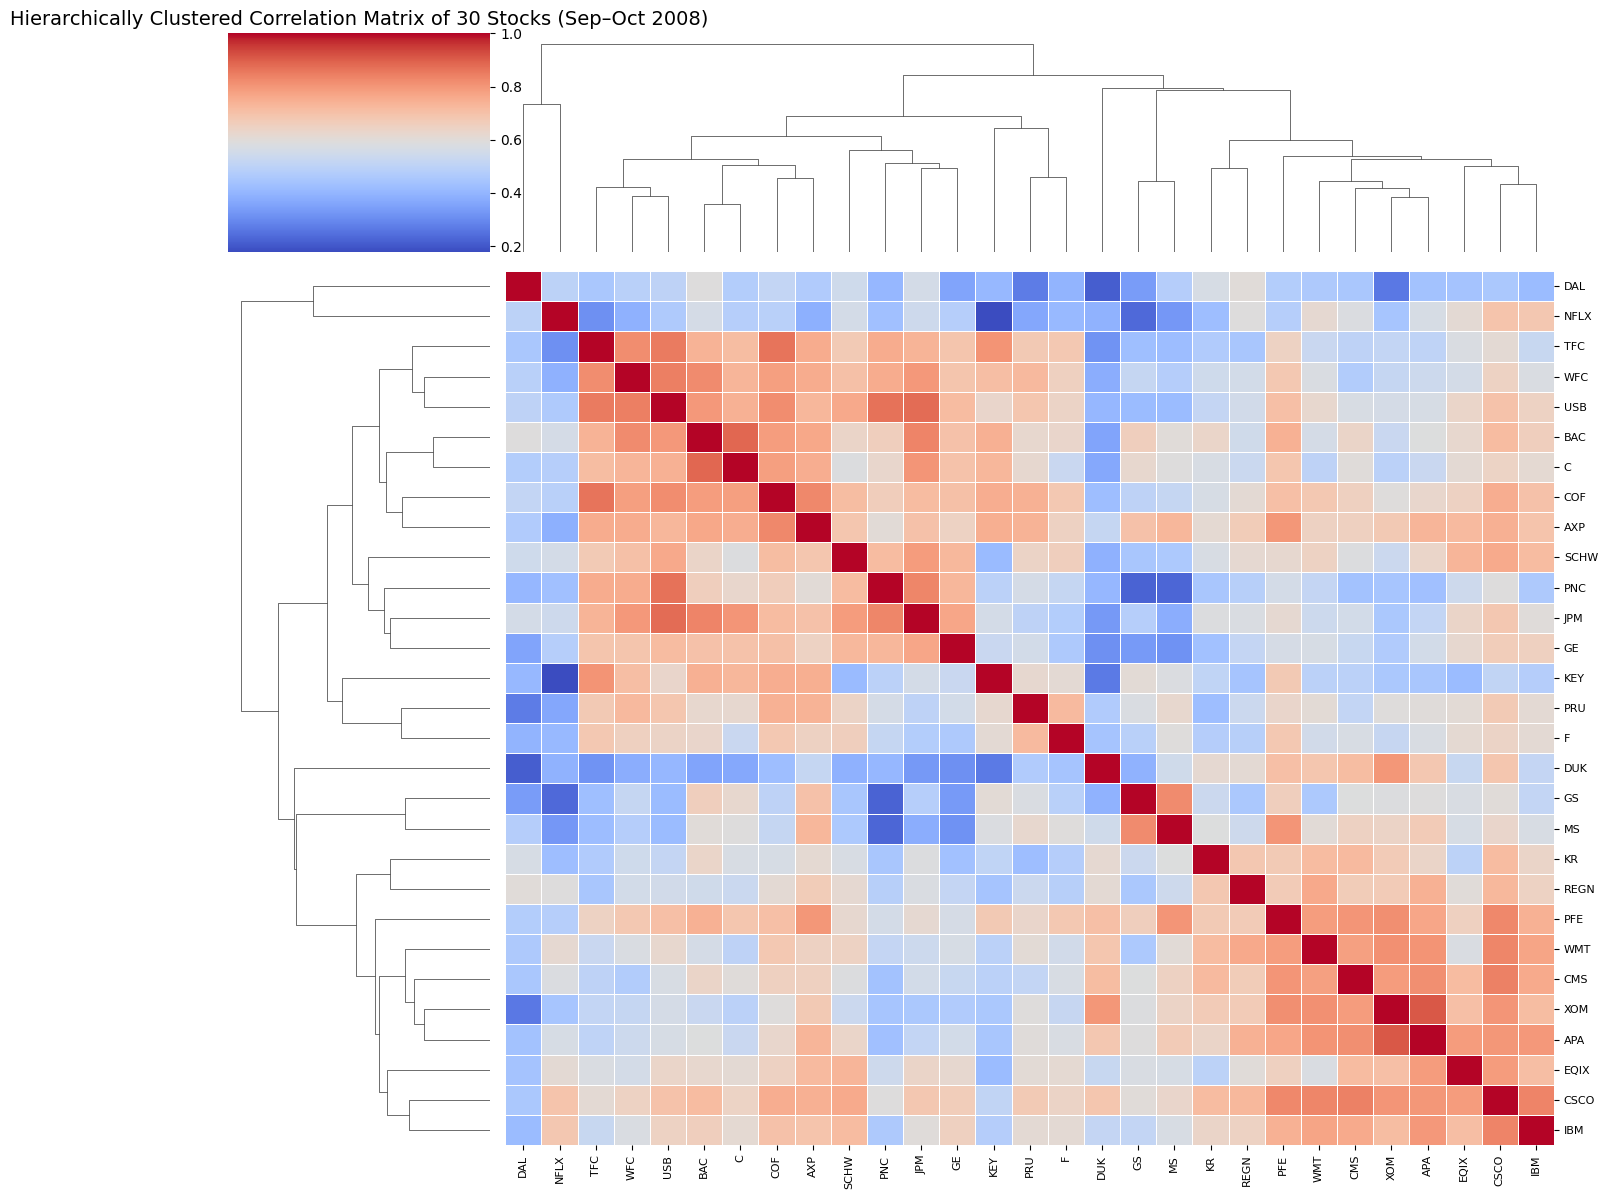

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#reading the data
df_clean = read_data()

# Compute log returns for all stocks
log_returns = np.log(df_clean / df_clean.shift(1)).dropna()

# Compute the 30x30 correlation matrix
corr_matrix = log_returns.corr()

# Generate a clustered heatmap using hierarchical clustering
clustered_heatmap = sns.clustermap(
    corr_matrix,
    method='average',      # Use average linkage for clustering
    cmap='coolwarm',       # Color map for correlations
    figsize=(14, 12),      # Adjust figure size
    dendrogram_ratio=0.2,  # Adjust dendrogram size
    linewidths=0.5         # Add lines between cells
)

# Add title and adjust layout
plt.title("Hierarchically Clustered Correlation Matrix of 30 Stocks (Sep–Oct 2008)", fontsize=14)
clustered_heatmap.ax_heatmap.set_xticklabels(clustered_heatmap.ax_heatmap.get_xmajorticklabels(), fontsize=8)
clustered_heatmap.ax_heatmap.set_yticklabels(clustered_heatmap.ax_heatmap.get_ymajorticklabels(), fontsize=8)
plt.tight_layout()
plt.show()

# Upper Confidence Bound (UCB) algorithm for portfolio selection


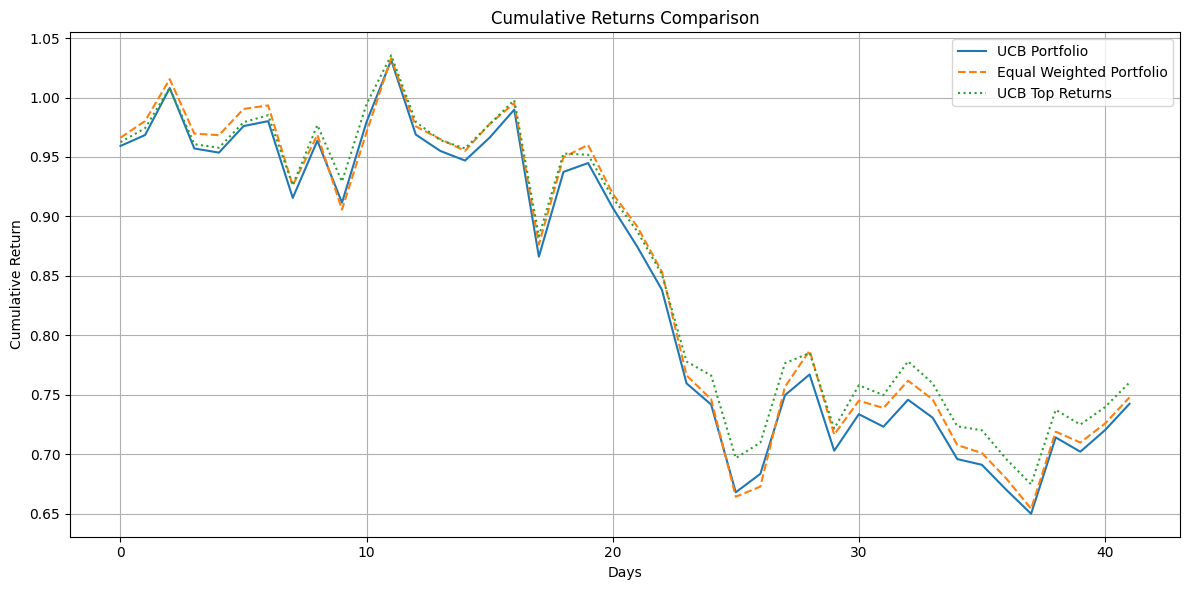

In [ ]:
#PORTFOLIO
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

def ucb_portfolio(df_returns, scale_ucb=True):
    n_days, n_stocks = df_returns.shape

    # Initialize
    counts = np.ones(n_stocks)  # count of times each stock was "used"
    total_rewards = df_returns.iloc[0].values.copy()  # use day 0 returns to start
    avg_rewards = total_rewards / counts

    ucb_returns = []

    for t in range(1, n_days):
        # Compute UCB scores
        ucb_scores = avg_rewards + np.sqrt((2 * np.log(t + 1)) / counts)

        # Optional: scale UCB scores to amplify differences
        if scale_ucb and ucb_scores.max() > ucb_scores.min():
            ucb_scores = (ucb_scores - ucb_scores.min()) / (ucb_scores.max() - ucb_scores.min())

        # Convert to portfolio weights
        weights = ucb_scores / ucb_scores.sum()

        # Calculate portfolio return
        daily_returns = df_returns.iloc[t].values
        portfolio_return = np.dot(weights, daily_returns)
        ucb_returns.append(portfolio_return)

        # Update reward stats
        for i in range(n_stocks):
            counts[i] += 1
            total_rewards[i] += daily_returns[i]
            avg_rewards[i] = total_rewards[i] / counts[i]

    return np.array(ucb_returns)

def top_k_ucb_vol_adjusted(df_returns, k=5, lam=0.5, window=10):
    n_days, n_stocks = df_returns.shape

    counts = np.ones(n_stocks)
    total_rewards = df_returns.iloc[0].values.copy()
    avg_rewards = total_rewards / counts

    ucb_returns = []

    for t in range(1, n_days):
        daily_returns = df_returns.iloc[t].values

        # Rolling volatility for each stock
        if t < 2:
            vol = np.ones(n_stocks)  # assume unit volatility to avoid NaN
        elif t < window:
            vol = df_returns.iloc[:t].std().values
        else:
            vol = df_returns.iloc[t - window:t].std().values

        # UCB with volatility penalty
        exploration = np.sqrt((2 * np.log(t + 1)) / counts)
        adjusted_ucb = avg_rewards + exploration - lam * vol

        # Select top-k
        top_k_indices = np.argsort(adjusted_ucb)[-k:]
        weights = np.zeros(n_stocks)
        top_scores = adjusted_ucb[top_k_indices]
        weights[top_k_indices] = top_scores / top_scores.sum()

        # Portfolio return
        portfolio_return = np.dot(weights, daily_returns)
        ucb_returns.append(portfolio_return)

        # Update reward tracking
        counts += 1
        total_rewards += daily_returns
        avg_rewards = total_rewards / counts

    return np.array(ucb_returns)

def equal_weight_portfolio(df_returns):
    weights = np.ones(df_returns.shape[1]) / df_returns.shape[1]
    daily_returns = df_returns.values
    portfolio_returns = daily_returns.dot(weights)
    return portfolio_returns[1:]  # match length with UCB (excluding first row)

def plot_cumulative_returns(ucb_returns, equal_returns, ucb_top_k_returns):
    plt.figure(figsize=(12, 6))
    plt.plot(np.cumprod(1 + ucb_returns), label='UCB Portfolio')
    plt.plot(np.cumprod(1 + equal_returns), label='Equal Weighted Portfolio', linestyle='--')
    plt.plot(np.cumprod(1 + ucb_top_k_returns), label='UCB Top Returns', linestyle='dotted')
    plt.title('Cumulative Returns Comparison')
    plt.xlabel('Days')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# df_prices: DataFrame of adj close prices (shape: [days, 30])
df_returns = np.log(df_clean / df_clean.shift(1)).dropna()

ucb_ret = ucb_portfolio(df_returns)
eq_ret = equal_weight_portfolio(df_returns)
ucb_top_10 = top_k_ucb_vol_adjusted(df_returns, k=24, lam=0.4, window=10)

plot_cumulative_returns(ucb_ret, eq_ret,ucb_top_10)

Based on the pseudocode above, we wrote a python code to implement UCB. A comparison study was done on 2 portfolios:


Equal weighted portfolio : (Assumption - 29 stocks to be picked each day, all with equal weights)


UCB portfolio : (Assumption - 29 stocks picked each day, varying weights decided by reward)


In the comparison made we observed that the UCB strategy is underperforming in this particular 2-month period.

**Enchancement of UCB**

For better performance, we implemented the following changes to the UCB Function:

Addition of parameter (k) to retrieve only the top k rewarded stocks in proportion each day.
Lambda parameter with a sliding window for volatility penalization.



# Picking Single Stock with max UCB score - Stationary k-armed bandit


Missing tickers: set()


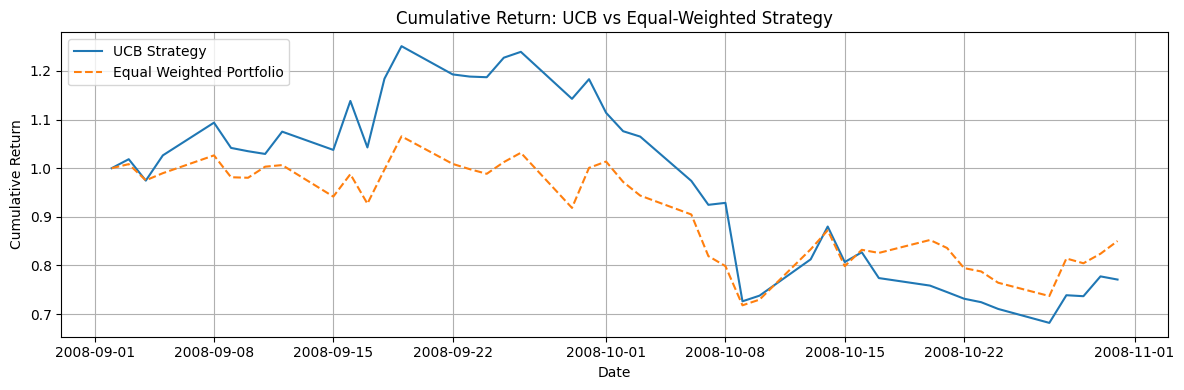

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import seed

# Data Prep
df_clean = read_data()
df_clean.reset_index(inplace=True)
tickers = df_clean.columns[1:]
df_data = df_clean[tickers]
YData = df_data.to_numpy()
YData_dates = pd.to_datetime(df_clean["Date"], format="%Y-%m-%d")

# UCB Bandit Parameters
NK = len(tickers)       # Number of arms (stocks)
NEPISODES = 1000         # Single run to reflect real strategy
HOLD = 1
TMAX = YData.shape[0] - HOLD

seed(1234)

# Initialize
reward_avg = np.zeros(TMAX)
optimal_avg = np.zeros(TMAX)

qvalue = np.zeros(NK)
counts = np.zeros(NK)

for tt in range(TMAX):
    # Compute UCB scores
    ucb_scores = np.zeros(NK)
    for aa in range(NK):
        if counts[aa] == 0:
            ucb_scores[aa] = np.inf  # Force selection to ensure exploration
        else:
            ucb_scores[aa] = qvalue[aa] + np.sqrt(np.log(tt + 1) / counts[aa])

    # Choose the stock with the highest UCB
    aa_opt = np.argmax(ucb_scores)
    counts[aa_opt] += 1

    # Compute reward for the selected stock
    reward = (YData[tt + HOLD, aa_opt] - YData[tt, aa_opt]) / YData[tt, aa_opt]
    reward_avg[tt] = reward

    # Update Q-value using incremental mean
    qvalue[aa_opt] += (reward - qvalue[aa_opt]) / counts[aa_opt]

    # Track if this was the optimal choice
    optimal_choice = np.argmax((YData[tt + HOLD, :] - YData[tt, :]) / YData[tt, :])
    optimal_avg[tt] = 1 if aa_opt == optimal_choice else 0

# Compute cumulative returns
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, :] = 1

for tt in range(1, TMAX + 1):
    # UCB strategy cumulative return
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    # Equal-weighted benchmark cumulative return
    rmean = np.mean((YData[tt + HOLD - 1, :] - YData[tt - 1, :]) / YData[tt - 1, :])
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(YData_dates[HOLD - 1 : YData.shape[0]], return_cumulative[:, 0], label="UCB Strategy")
plt.plot(YData_dates[HOLD - 1 : YData.shape[0]], return_cumulative[:, 1], label="Equal Weighted Portfolio", linestyle="--")
plt.title("Cumulative Return: UCB vs Equal-Weighted Strategy")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


Instead of allocation of all stocks (everyday) in varying proportions in the portfolio, we can follow the approach of single stock selection everyday that maximizes the UCB score.

Using the pseudocode above, we write a code in python for a stationary k-armed bandit (29 arms) running for 1000 episodes and compare the cumulative returns from MAB vs the general case.


# Application of Epsilon Greedy Algorithm

The epsilon-greedy approach works well in non-stationary environments, where the best option may change over time. The exploration ensures that the agent doesn’t get “stuck” in an outdated idea of what’s best. (Vinija)


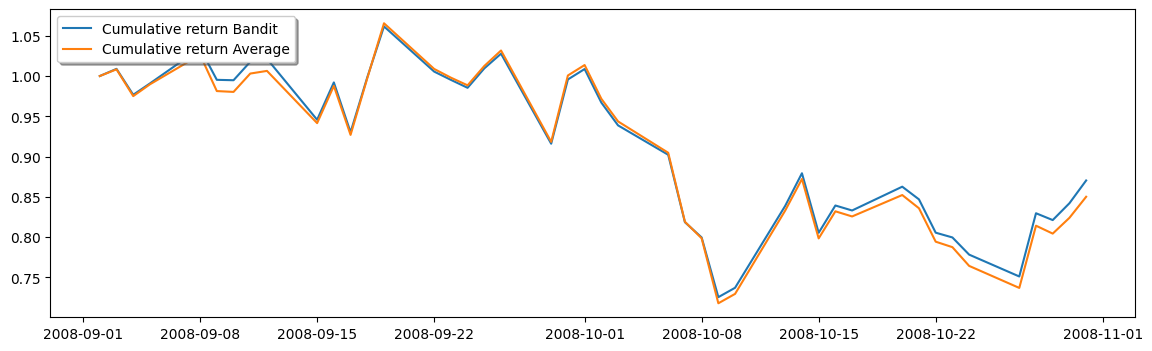

In [ ]:
# Read stock price information -- SINGLE STOCK

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from numpy.random import rand, seed


def optimal_action(qvalue, eps):  # noQA E203
    """
    Determines what is the action to take given a measure of past
    expected rewards across actions. With probability eps the action
    is not the greedy one
    """
    nactions = qvalue.shape[0]
    action_hat = np.where(qvalue == np.max(qvalue))

    if rand() <= eps:
        randnum = rand()
        for aa in range(nactions):
            if randnum < (aa + 1) / nactions:  # noQA E203
                break
    elif action_hat[0].shape[0] > 1:  # noQA E203
        # Randomize action when ties
        randnum = rand()
        for aa in range(action_hat[0].shape[0]):  # noQA E203
            if randnum < (aa + 1) / action_hat[0].shape[0]:  # noQA E203
                break
        aa = action_hat[0][aa]
    else:
        aa = np.argmax(qvalue)

    return aa


def reward_update(action, reward, qvalue_old, alpha):  # noQA E203
    qvalue_new = qvalue_old.copy()

    qvalue_new[action] = qvalue_old[action] + alpha * (reward - qvalue_old[action])

    return qvalue_new

#Data Prep
df_clean = read_data()
df_clean.reset_index(inplace=True)

#Filter out dates and values
tickers = df_clean.columns[1:]
df_data = df_clean[tickers]
YData = df_data.to_numpy()
YData_dates = pd.to_datetime(df_clean["Date"], format="%Y-%m-%d")

# Bandit problem for stock selection

NK = 29
EPSILON = 0.1
ALPHA = 0.90
NEPISODES = 1000
HOLD = 1
TMAX = YData.shape[0] - HOLD

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):  # noQA E203
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (
            YData[tt + HOLD, aa_opt] - YData[tt, aa_opt]
        ) / YData[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(
            int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA
        )
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            if nactions[aa] == 0:  # noQA E203
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (
            aa_opt == np.argmax((YData[tt + HOLD, :] - YData[tt, :]) / YData[tt, :])
        ) / NEPISODES  # noQA E203


return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean(
        (YData[tt + HOLD - 1, :] - YData[tt - 1, :]) / YData[tt - 1, :]
    )  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)  # noQA E203
plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(14, 4)
plt.show()

We observe that in early phases, and at the terminal end of data the epsilon-greedy approach slightly outperforms the equally weighted portfolio.

# Comparison of results - Equal weighted portfolio vs Epsilon Greedy portfolio

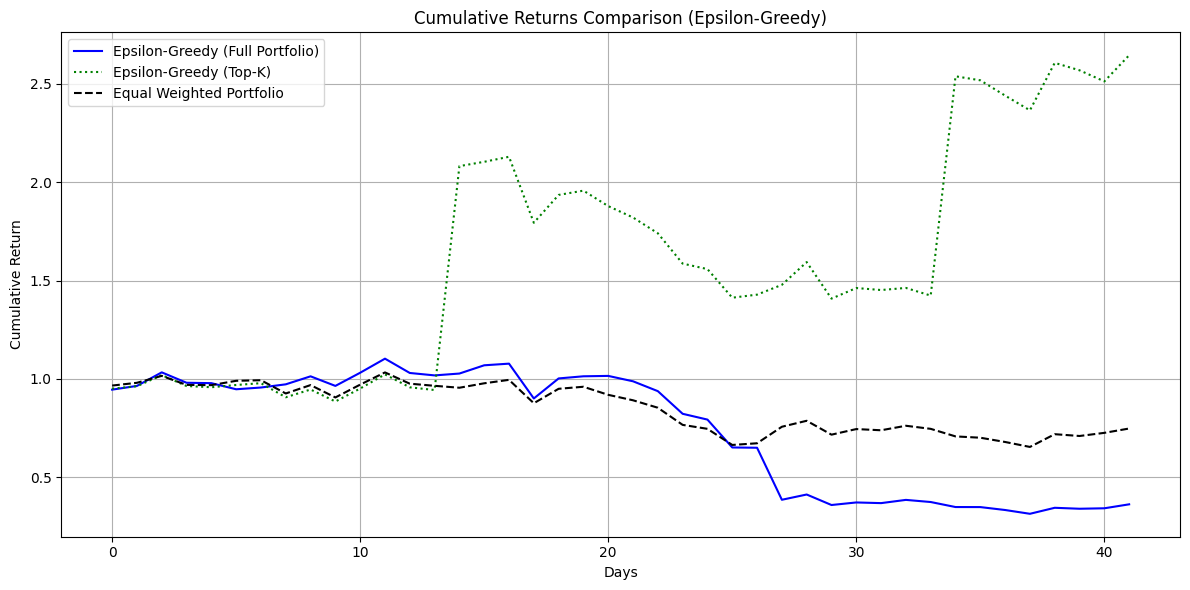

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy_portfolio_sim(df_returns, epsilon, alpha, n_simulations):
    n_days, n_stocks = df_returns.shape
    all_returns = np.zeros((n_simulations, n_days - 1))

    for sim in range(n_simulations):
        estimated_rewards = df_returns.iloc[0].values.copy()
        sim_returns = []

        for t in range(1, n_days):
            if np.random.rand() < epsilon:
                weights = np.random.rand(n_stocks)
            else:
                weights = estimated_rewards.copy()

            weights /= weights.sum()
            daily_returns = df_returns.iloc[t].values
            sim_returns.append(np.dot(weights, daily_returns))
            estimated_rewards = (1 - alpha) * estimated_rewards + alpha * daily_returns

        all_returns[sim] = sim_returns

    return all_returns.mean(axis=0)


def top_k_epsilon_greedy_sim(df_returns, k, epsilon, alpha, n_simulations):
    n_days, n_stocks = df_returns.shape
    all_returns = np.zeros((n_simulations, n_days - 1))

    for sim in range(n_simulations):
        estimated_rewards = df_returns.iloc[0].values.copy()
        sim_returns = []

        for t in range(1, n_days):
            if np.random.rand() < epsilon:
                top_k_indices = np.random.choice(n_stocks, k, replace=False)
            else:
                top_k_indices = np.argsort(estimated_rewards)[-k:]

            weights = np.zeros(n_stocks)
            top_scores = estimated_rewards[top_k_indices]
            if top_scores.sum() == 0:
                weights[top_k_indices] = 1.0 / k
            else:
                weights[top_k_indices] = top_scores / top_scores.sum()

            daily_returns = df_returns.iloc[t].values
            sim_returns.append(np.dot(weights, daily_returns))
            estimated_rewards = (1 - alpha) * estimated_rewards + alpha * daily_returns

        all_returns[sim] = sim_returns

    return all_returns.mean(axis=0)

def equal_weight_portfolio(df_returns):
    weights = np.ones(df_returns.shape[1]) / df_returns.shape[1]
    daily_returns = df_returns.values
    portfolio_returns = daily_returns.dot(weights)
    return portfolio_returns[1:]  # match length

def plot_cumulative_returns(eg_full, eg_top_k, equal_returns):
    plt.figure(figsize=(12, 6))
    plt.plot(np.cumprod(1 + eg_full), label='Epsilon-Greedy (Full Portfolio)', color='blue')
    plt.plot(np.cumprod(1 + eg_top_k), label='Epsilon-Greedy (Top-K)', linestyle='dotted', color='green')
    plt.plot(np.cumprod(1 + equal_returns), label='Equal Weighted Portfolio', linestyle='--', color='black')
    plt.title('Cumulative Returns Comparison (Epsilon-Greedy)')
    plt.xlabel('Days')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Assume df_clean is your DataFrame with adjusted close prices
df_clean = read_data()
df_returns = np.log(df_clean / df_clean.shift(1)).dropna()

eg_full = epsilon_greedy_portfolio_sim(df_returns, epsilon=0.1, alpha=0.99, n_simulations=200)
eg_top_k = top_k_epsilon_greedy_sim(df_returns, k=20, epsilon=0.1, alpha=0.99, n_simulations=200)
eq_ret = equal_weight_portfolio(df_returns)

plot_cumulative_returns(eg_full, eg_top_k, eq_ret)


From the results, we observe that an epsilon-greedy (Top-k) portfolio outperforms the equal weighted portfolio by a very big margin.


# Results with recent data

In [ ]:
#Latest Data

def read_data():

  # Load CSV file (ensure dates are parsed as datetime)
  df = pd.read_csv('stocks_data_2025.csv', parse_dates=['Date'], index_col='Date')

  # Define tickers (30 total)
  financial_tickers = ['JPM','WFC','BAC','C','GS','USB','MS','KEY','PNC','COF','AXP','PRU','SCHW','TFC']  # 14 (TFC replaces BBT/STI)
  non_financial_tickers = ['KR','PFE','XOM','WMT','DAL','CSCO','IBM','EQIX','DUK','NFLX','GE','APA','F','REGN','CMS']  # 15

  # Verify all 30 columns are present
  all_tickers = financial_tickers + non_financial_tickers
  missing_tickers = set(all_tickers) - set(df.columns)
  #print("Missing tickers:", missing_tickers)  # Should return empty set

  # Drop rows with missing values (if any)
  df_clean = df.dropna()

  return df_clean

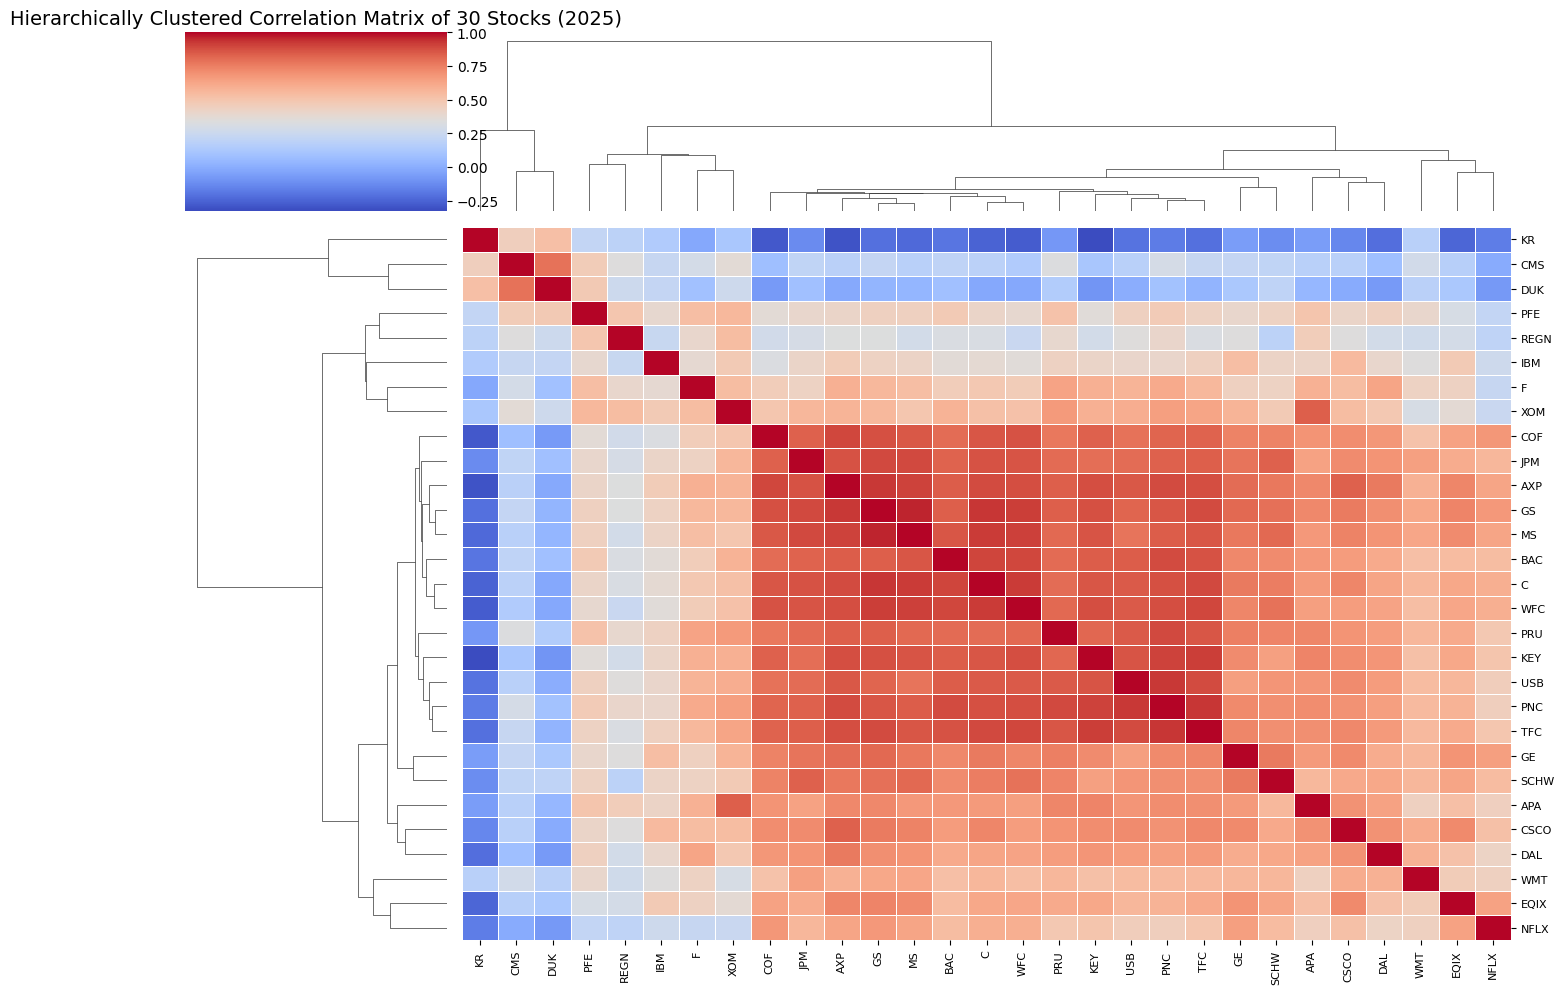

In [ ]:
#reading the data
df_clean = read_data()

# Compute log returns for all stocks
log_returns = np.log(df_clean / df_clean.shift(1)).dropna()

# Compute the 30x30 correlation matrix
corr_matrix = log_returns.corr()

# Generate a clustered heatmap using hierarchical clustering
clustered_heatmap = sns.clustermap(
    corr_matrix,
    method='average',      # Use average linkage for clustering
    cmap='coolwarm',       # Color map for correlations
    figsize=(14, 10),      # Adjust figure size
    dendrogram_ratio=0.2,  # Adjust dendrogram size
    linewidths=0.5         # Add lines between cells
)

# Add title and adjust layout
plt.title("Hierarchically Clustered Correlation Matrix of 30 Stocks (2025)", fontsize=14)
clustered_heatmap.ax_heatmap.set_xticklabels(clustered_heatmap.ax_heatmap.get_xmajorticklabels(), fontsize=8)
clustered_heatmap.ax_heatmap.set_yticklabels(clustered_heatmap.ax_heatmap.get_ymajorticklabels(), fontsize=8)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Returns with Regime Changes')

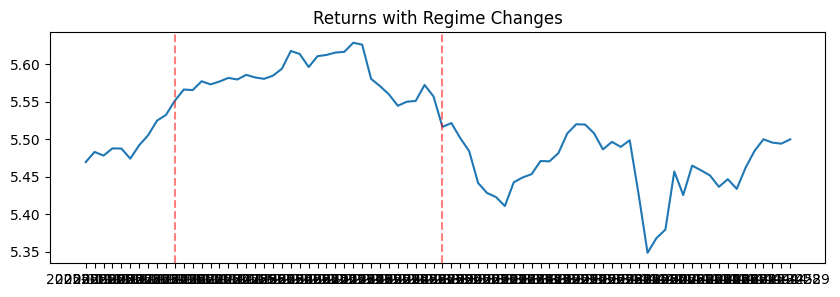

In [ ]:
df_clean = read_data()

import ruptures as rpt

#ETL with data
PData = pd.read_csv(r'stocks_data_2025.csv')
PData = PData[['Date','JPM']]

#Refine the data to select a period
PData.set_index('Date', inplace=True)
returns = PData["JPM"].dropna()
returns = np.log(returns)
volatility = returns.abs()

# Detect change points in volatility using the Pelt algorithm
algo = rpt.Pelt(model="rbf").fit(volatility.values)
result = algo.predict(pen=5)
change_indices = result[:-1]

# Convert change point indices to dates
change_indices = result[:-1]
change_dates = [returns.index[i] for i in change_indices]

# Plot S&P500 RETURNS with regime changes
plt.figure(figsize=(10, 3))
plt.plot(returns, label='Returns')
for date in change_dates:
    plt.axvline(date, color='r', linestyle='--', alpha=0.5, label='Regime Change')
plt.title('Returns with Regime Changes')

# UCB Greedy Algorithm : Portfolio and Single Stock allocation

For the UCB (portfolio allocation) unlike the previous case, we observe the values for the top-k UCB approach more closely aligned to the equal weighted portfolio. (lambda : 0.1, k = 20)


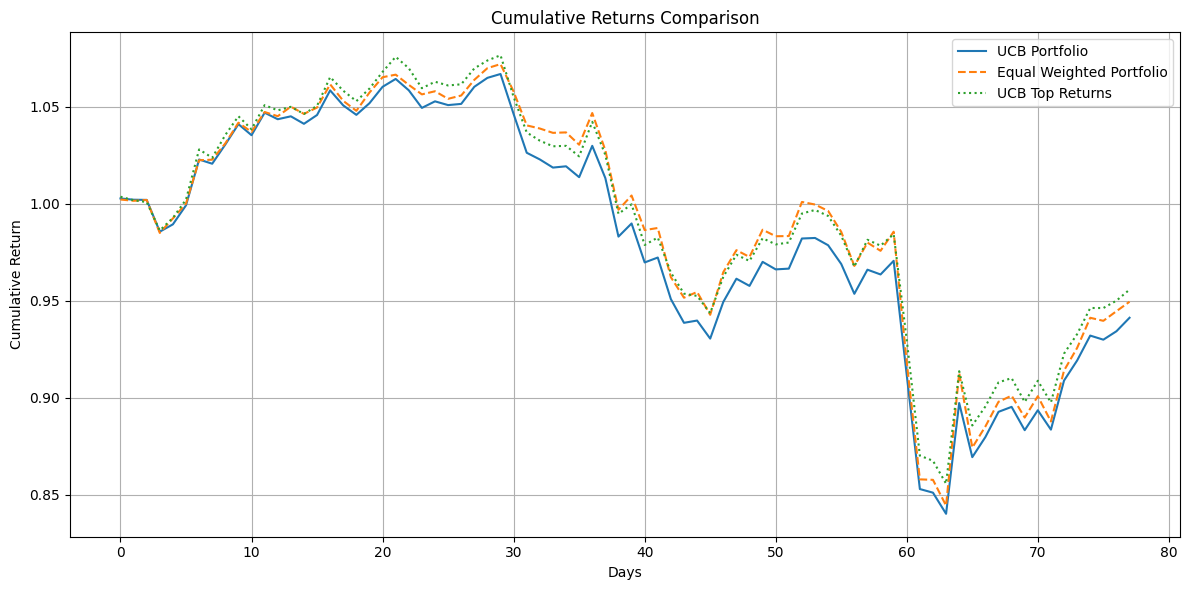

In [ ]:
#PORTFOLIO
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

def ucb_portfolio(df_returns, scale_ucb=True):
    n_days, n_stocks = df_returns.shape

    # Initialize
    counts = np.ones(n_stocks)  # count of times each stock was "used"
    total_rewards = df_returns.iloc[0].values.copy()  # use day 0 returns to start
    avg_rewards = total_rewards / counts

    ucb_returns = []

    for t in range(1, n_days):
        # Compute UCB scores
        ucb_scores = avg_rewards + np.sqrt((2 * np.log(t + 1)) / counts)

        # Optional: scale UCB scores to amplify differences
        if scale_ucb and ucb_scores.max() > ucb_scores.min():
            ucb_scores = (ucb_scores - ucb_scores.min()) / (ucb_scores.max() - ucb_scores.min())

        # Convert to portfolio weights
        weights = ucb_scores / ucb_scores.sum()

        # Calculate portfolio return
        daily_returns = df_returns.iloc[t].values
        portfolio_return = np.dot(weights, daily_returns)
        ucb_returns.append(portfolio_return)

        # Update reward stats
        for i in range(n_stocks):
            counts[i] += 1
            total_rewards[i] += daily_returns[i]
            avg_rewards[i] = total_rewards[i] / counts[i]

    return np.array(ucb_returns)

def top_k_ucb_vol_adjusted(df_returns, k=5, lam=0.5, window=10):
    n_days, n_stocks = df_returns.shape

    counts = np.ones(n_stocks)
    total_rewards = df_returns.iloc[0].values.copy()
    avg_rewards = total_rewards / counts

    ucb_returns = []

    for t in range(1, n_days):
        daily_returns = df_returns.iloc[t].values

        # Rolling volatility for each stock
        if t < 2:
            vol = np.ones(n_stocks)  # assume unit volatility to avoid NaN
        elif t < window:
            vol = df_returns.iloc[:t].std().values
        else:
            vol = df_returns.iloc[t - window:t].std().values

        # UCB with volatility penalty
        exploration = np.sqrt((2 * np.log(t + 1)) / counts)
        adjusted_ucb = avg_rewards + exploration - lam * vol

        # Select top-k
        top_k_indices = np.argsort(adjusted_ucb)[-k:]
        weights = np.zeros(n_stocks)
        top_scores = adjusted_ucb[top_k_indices]
        weights[top_k_indices] = top_scores / top_scores.sum()

        # Portfolio return
        portfolio_return = np.dot(weights, daily_returns)
        ucb_returns.append(portfolio_return)

        # Update reward tracking
        counts += 1
        total_rewards += daily_returns
        avg_rewards = total_rewards / counts

    return np.array(ucb_returns)

def equal_weight_portfolio(df_returns):
    weights = np.ones(df_returns.shape[1]) / df_returns.shape[1]
    daily_returns = df_returns.values
    portfolio_returns = daily_returns.dot(weights)
    return portfolio_returns[1:]  # match length with UCB (excluding first row)

def plot_cumulative_returns(ucb_returns, equal_returns, ucb_top_k_returns):
    plt.figure(figsize=(12, 6))
    plt.plot(np.cumprod(1 + ucb_returns), label='UCB Portfolio')
    plt.plot(np.cumprod(1 + equal_returns), label='Equal Weighted Portfolio', linestyle='--')
    plt.plot(np.cumprod(1 + ucb_top_k_returns), label='UCB Top Returns', linestyle='dotted')
    plt.title('Cumulative Returns Comparison')
    plt.xlabel('Days')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# df_prices: DataFrame of adj close prices (shape: [days, 30])
df_returns = np.log(df_clean / df_clean.shift(1)).dropna()

ucb_ret = ucb_portfolio(df_returns)
eq_ret = equal_weight_portfolio(df_returns)
ucb_top_10 = top_k_ucb_vol_adjusted(df_returns, k=20, lam=0.1, window=30)

plot_cumulative_returns(ucb_ret, eq_ret,ucb_top_10)

Since in our stock basket, from the heatmap we observed the multiple stocks are having correlated returns, the volatility spikes can make it worsen. We can reduce the top k value to lower (5). An update to k here shifts the top-k UCB > equal weighted portfolio.

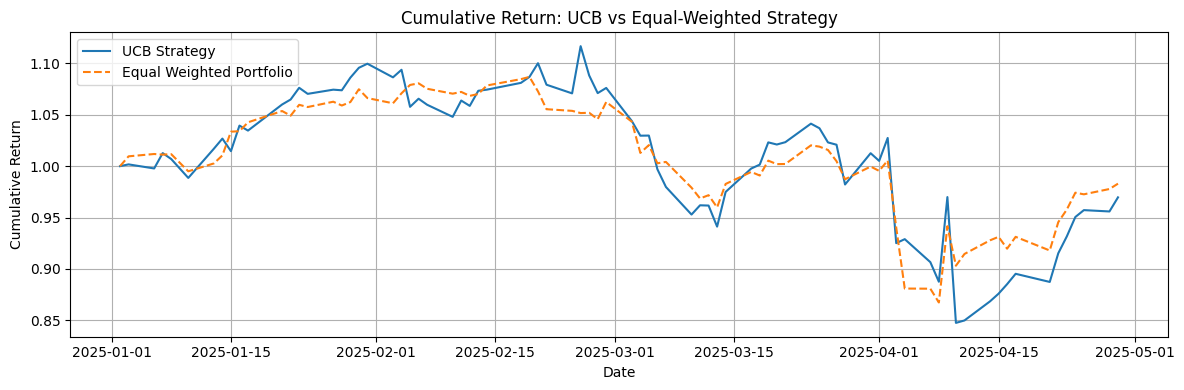

In [ ]:
# Data Prep
df_clean = read_data()
df_clean.reset_index(inplace=True)
tickers = df_clean.columns[1:]
df_data = df_clean[tickers]
YData = df_data.to_numpy()
YData_dates = pd.to_datetime(df_clean["Date"], format="%Y-%m-%d")

# UCB Bandit Parameters
NK = len(tickers)       # Number of arms (stocks)
NEPISODES = 1000         # Single run to reflect real strategy
HOLD = 1
TMAX = YData.shape[0] - HOLD

seed(1234)

# Initialize
reward_avg = np.zeros(TMAX)
optimal_avg = np.zeros(TMAX)

qvalue = np.zeros(NK)
counts = np.zeros(NK)

for tt in range(TMAX):
    # Compute UCB scores
    ucb_scores = np.zeros(NK)
    for aa in range(NK):
        if counts[aa] == 0:
            ucb_scores[aa] = np.inf  # Force selection to ensure exploration
        else:
            ucb_scores[aa] = qvalue[aa] + np.sqrt(np.log(tt + 1) / counts[aa])

    # Choose the stock with the highest UCB
    aa_opt = np.argmax(ucb_scores)
    counts[aa_opt] += 1

    # Compute reward for the selected stock
    reward = (YData[tt + HOLD, aa_opt] - YData[tt, aa_opt]) / YData[tt, aa_opt]
    reward_avg[tt] = reward

    # Update Q-value using incremental mean
    qvalue[aa_opt] += (reward - qvalue[aa_opt]) / counts[aa_opt]

    # Track if this was the optimal choice
    optimal_choice = np.argmax((YData[tt + HOLD, :] - YData[tt, :]) / YData[tt, :])
    optimal_avg[tt] = 1 if aa_opt == optimal_choice else 0

# Compute cumulative returns
return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, :] = 1

for tt in range(1, TMAX + 1):
    # UCB strategy cumulative return
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    # Equal-weighted benchmark cumulative return
    rmean = np.mean((YData[tt + HOLD - 1, :] - YData[tt - 1, :]) / YData[tt - 1, :])
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)

# Plot
plt.figure(figsize=(12, 4))
plt.plot(YData_dates[HOLD - 1 : YData.shape[0]], return_cumulative[:, 0], label="UCB Strategy")
plt.plot(YData_dates[HOLD - 1 : YData.shape[0]], return_cumulative[:, 1], label="Equal Weighted Portfolio", linestyle="--")
plt.title("Cumulative Return: UCB vs Equal-Weighted Strategy")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

Comparably, the single stock allocation strategy for UCB seems to outperform the equal weighted portfolio with the recent data amidst volatility spikes.


# Epsilon Greedy Case

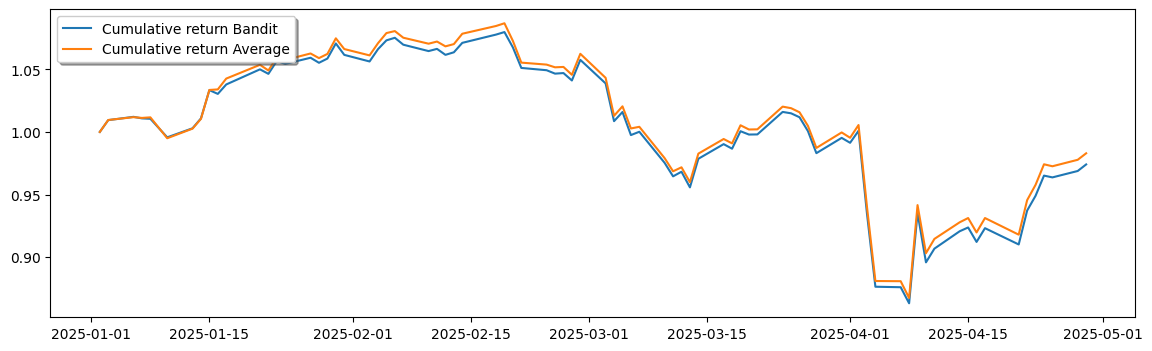

In [ ]:

#Data Prep
df_clean = read_data()
df_clean.reset_index(inplace=True)

#Filter out dates and values
tickers = df_clean.columns[1:]
df_data = df_clean[tickers]
YData = df_data.to_numpy()
YData_dates = pd.to_datetime(df_clean["Date"], format="%Y-%m-%d")

# Bandit problem for stock selection

NK = 29
EPSILON = 0.1
ALPHA = 0.99
NEPISODES = 1000
HOLD = 1
TMAX = YData.shape[0] - HOLD

seed(1234)

reward_avg = np.zeros((TMAX))
optimal_avg = np.zeros((TMAX))

reward_queue = np.zeros((HOLD, 2))

for run in range(NEPISODES):  # noQA E203
    # Initialize q function and actions record
    qvalue = np.zeros((NK))
    qvalue_up = np.zeros((NK))
    nactions = np.zeros((NK))
    for tt in range(TMAX):  # noQA E203
        aa_opt = optimal_action(qvalue_up, EPSILON)
        nactions[aa_opt] += 1
        # Compute reward as return over holding period
        reward_queue[HOLD - 1, 0] = (
            YData[tt + HOLD, aa_opt] - YData[tt, aa_opt]
        ) / YData[tt, aa_opt]
        reward_queue[HOLD - 1, 1] = aa_opt
        # Update Q function using action chosen HOLD days before
        qvalue = reward_update(
            int(reward_queue[0, 1]), reward_queue[0, 0], qvalue, ALPHA
        )
        # Upper-confidence adjustment
        qvalue_up = np.zeros((NK))
        for aa in range(NK):
            if nactions[aa] == 0:  # noQA E203
                qvalue_up[aa] = np.max(qvalue) + 1.0
            else:
                qvalue_up[aa] = qvalue[aa] + np.sqrt(np.log(tt + 1) / nactions[aa])
        reward_queue[0 : HOLD - 1, :] = reward_queue[1:HOLD, :]  # noQA E203
        reward_avg[tt] += reward_queue[HOLD - 1, 0] / NEPISODES
        optimal_avg[tt] += (
            aa_opt == np.argmax((YData[tt + HOLD, :] - YData[tt, :]) / YData[tt, :])
        ) / NEPISODES  # noQA E203


return_cumulative = np.zeros((TMAX + 1, 2))
return_cumulative[0, 0] = 1
return_cumulative[0, 1] = 1
for tt in range(1, TMAX + 1):  # noQA E203
    return_cumulative[tt, 0] = return_cumulative[tt - 1, 0] * (1 + reward_avg[tt - 1])
    rmean = np.mean(
        (YData[tt + HOLD - 1, :] - YData[tt - 1, :]) / YData[tt - 1, :]
    )  # noQA E203
    return_cumulative[tt, 1] = return_cumulative[tt - 1, 1] * (1 + rmean)  # noQA E203

plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 0],
    label="Cumulative return Bandit",
)  # noQA E203
plt.plot(
    YData_dates[HOLD - 1 : YData.shape[0]],
    return_cumulative[:, 1],
    label="Cumulative return Average",
)  # noQA E203
legend = plt.legend(loc="upper left", shadow=True)
fig = plt.gcf()
fig.set_size_inches(14, 4)
plt.show()

Epsilon Greedy Algorithm
Comparable to the general single stock allocation in UCB, the epsilon greedy method lies very close to the equal weighted portfolio. The reason for this could possibly be in the highly correlated returns observed across multiple stocks.


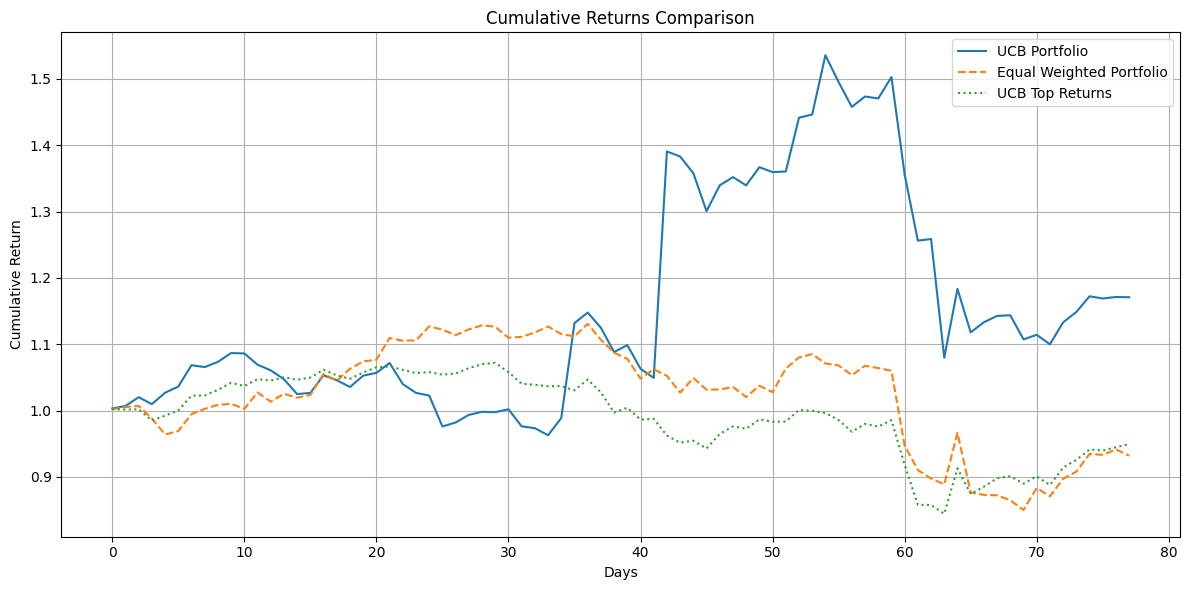

In [ ]:
# Assume df_clean is your DataFrame with adjusted close prices
df_clean = read_data()
df_returns = np.log(df_clean / df_clean.shift(1)).dropna()

eg_full = epsilon_greedy_portfolio_sim(df_returns, epsilon=0.1, alpha=0.99, n_simulations=200)
eg_top_k = top_k_epsilon_greedy_sim(df_returns, k=5, epsilon=0.1, alpha=0.99, n_simulations=200)
eq_ret = equal_weight_portfolio(df_returns)

plot_cumulative_returns(eg_full, eg_top_k, eq_ret)

If we try to trim down the top k stock to select in the case of portfolio allocation, to account for the correlation risk, we observe a better performance where the epsilon greedy case outperforms the equally weighted portfolio.

# References
* Huo, Xiaoguang, and Feng Fu. “Risk-aware Multi-armed Bandit Problem With Application to Portfolio Selection.” Royal Society Open Science, vol. 4, no. 11, Nov. 2017, p. 171377. https://doi.org/10.1098/rsos.171377.
* Eric. Introduction to Markov-Switching Models | Aptech. 3 Sept. 2021, www.aptech.com/blog/introduction-to-markov-switching-models.
* Van Norden, Simon, et al. “REGIME-SWITCHING MODELS.” Working Paper 96-3 / Document De Travail 96-3, Working Paper, Bank of Canada, 1996, www.bankofcanada.ca/wp-content/uploads/2010/05/wp96-3.pdf.
* Piger, Jeremy. “Econometrics: Models of Regime Changes.” Springer eBooks, 2009, pp. 190–202. https://doi.org/10.1007/978-1-4419-7701-4_10.
* Vinija’s Notes • Recommendation Systems • Multi-Armed Bandits. vinija.ai/recsys/multi-armed-bandit.